# Tugas 05 : **keyword extraction**

NAMA : Mohammad Iqbal Surya Ramadhan

NIM  : 210411100002

MATA KULIAH : Pencarian dan Penambangan Web - A

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
!pip install Sastrawi
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPWA/report/Tugas-PPWA/Hasil_Prepros.csv")
df.head()

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,stopword_removal
0,"Nunggak 8 Bulan, Segini Pajak Ford Mustang Mil...","Kamis, 19 Sep 2024 13:05 WIB",Jakarta - Bareskrim Polri menyita aset senilai...,Otomotif,Jakarta Bareskrim Polri menyita aset senilai ...,jakarta bareskrim polri menyita aset senilai ...,"['jakarta', 'bareskrim', 'polri', 'menyita', '...",jakarta bareskrim polri menyita aset senilai r...
1,Bos Ford Kaget usai Jajal Mobil China: Mereka ...,"Kamis, 19 Sep 2024 12:33 WIB","Jakarta - Chief Executive Officer (CEO) Ford, ...",Otomotif,Jakarta Chief Executive Officer CEO Ford Jim ...,jakarta chief executive officer ceo ford jim ...,"['jakarta', 'chief', 'executive', 'officer', '...",jakarta chief executive officer ceo ford jim f...
2,"Tarif Tol Dalam Kota Naik Jadi Segini, Berlaku...","Kamis, 19 Sep 2024 12:08 WIB",Jakarta - Jasa Marga mengumumkan kenaikan tari...,Otomotif,Jakarta Jasa Marga mengumumkan kenaikan tarif...,jakarta jasa marga mengumumkan kenaikan tarif...,"['jakarta', 'jasa', 'marga', 'mengumumkan', 'k...",jakarta jasa marga mengumumkan kenaikan tarif ...
3,Pak RT Aleix Espargaro Tak Sabar Balapan Terak...,"Kamis, 19 Sep 2024 11:40 WIB","Jakarta - Pebalap Aprilia asal Spanyol, Aleix ...",Otomotif,Jakarta Pebalap Aprilia asal Spanyol Aleix Es...,jakarta pebalap aprilia asal spanyol aleix es...,"['jakarta', 'pebalap', 'aprilia', 'asal', 'spa...",jakarta pebalap aprilia spanyol aleix espargar...
4,Angkot Listrik Bakal Diuji Coba di Jakarta,"Kamis, 19 Sep 2024 11:18 WIB",Jakarta - PT Transportasi Jakarta (TransJakart...,Otomotif,Jakarta PT Transportasi Jakarta TransJakarta ...,jakarta pt transportasi jakarta transjakarta ...,"['jakarta', 'pt', 'transportasi', 'jakarta', '...",jakarta pt transportasi jakarta transjakarta k...


In [4]:
# Mengambil satu sample berita
sample_berita = df['stopword_removal'].iloc[4]

sample_berita_list = [sample_berita]
print(sample_berita_list)


['jakarta pt transportasi jakarta transjakarta kalinya menguji coba mikro trans alias angkot bertenaga listrik membuktikan perusahaan benarbenar serius beralih kendaraan konvensional kendaraan ramah lingkungan kepala departemen humas csr pt transjakarta ayu wardhani uji coba tahap unit armada mikro trans mengurai detail rute angkot listrik detail tanggal pelaksanaan upaya mewujudkan target pemerintah provinsi dki jakarta persen armada transjakarta bus listrik elektrifikasi transportasi publik ayu wardhani dikutip kamis ayu angkot listrik diuji coba kapasitas penumpang orang kapasitas angkot konvensional dilengkapi air conditioner ac pendingin udara angkot listrik dioperasikan transjakarta basis dfsk gelora e blind van elektrik transjakarta menandatangani nota kesepahaman pt sokonindo automobile agen pemegang merek dfsk indonesia angkutan ramah lingkungan disematkan baterai berkapasitas kwh daya tempuh maksimum km pengecasannya jam fitur fast charging ayu mengklaim berinovasi menghadirk

In [5]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer tanpa batasan jumlah fitur
vectorizer = TfidfVectorizer()

# Fit dan transform teks ke dalam TF-IDF
tfidf_matrix = vectorizer.fit_transform(sample_berita_list)

# Konversi TF-IDF matrix ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()

,ac,agen,air,alias,angkot,angkutan,armada,automobile,ayu,basis,...,terbaik,trans,transjakarta,transportasi,udara,uji,unit,upaya,van,wardhani
0,0.107366,0.053683,0.053683,0.053683,0.322097,0.053683,0.161048,0.053683,0.214731,0.053683,...,0.053683,0.214731,0.322097,0.107366,0.053683,0.053683,0.214731,0.053683,0.053683,0.107366


In [6]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_tfidf_1berita = tfidf_df.apply(lambda col: col.map(lambda x: 1 if x >= 0.03 else 0))

# Menampilkan DataFrame dengan nilai biner
df_tfidf_1berita

,ac,agen,air,alias,angkot,angkutan,armada,automobile,ayu,basis,...,terbaik,trans,transjakarta,transportasi,udara,uji,unit,upaya,van,wardhani
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_tfidf_1berita.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_tfidf_1berita)):
    features = df_tfidf_1berita.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

             Node  Degree Centrality
0              ac                1.0
64       mengurai                1.0
74      pendingin                1.0
73     pemerintah                1.0
72       pemegang                1.0
..            ...                ...
31   dioperasikan                1.0
30     dilengkapi                1.0
29        dikutip                1.0
28           dfsk                1.0
100      wardhani                1.0

[101 rows x 2 columns]


In [8]:
# Ambil top 10 fitur dengan degree centrality tertinggi
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()

# DataFrame yang difilter berdasarkan top 10 fitur
filtered_df_train_tfidf = df_tfidf_1berita.copy()

# Tampilkan pesan tentang top 10 fitur yang terpilih
print("\nTop 10 fitur berdasarkan degree centrality:")
print(top_10_features)

# Tampilkan DataFrame asli yang masih memiliki semua fitur
print("\nDataFrame asli dengan semua fitur (tanpa menghapus):")
print(filtered_df_train_tfidf)



Top 10 fitur berdasarkan degree centrality:
['ac', 'mengurai', 'pendingin', 'pemerintah', 'pemegang', 'pelanggan', 'pelaksanaan', 'orang', 'nota', 'mikro']

DataFrame asli dengan semua fitur (tanpa menghapus):
   ac  agen  air  alias  angkot  angkutan  armada  automobile  ayu  basis  \
0   1     1    1      1       1         1       1           1    1      1   

   ...  terbaik  trans  transjakarta  transportasi  udara  uji  unit  upaya  \
0  ...        1      1             1             1      1    1     1      1   

   van  wardhani  
0    1         1  

[1 rows x 101 columns]


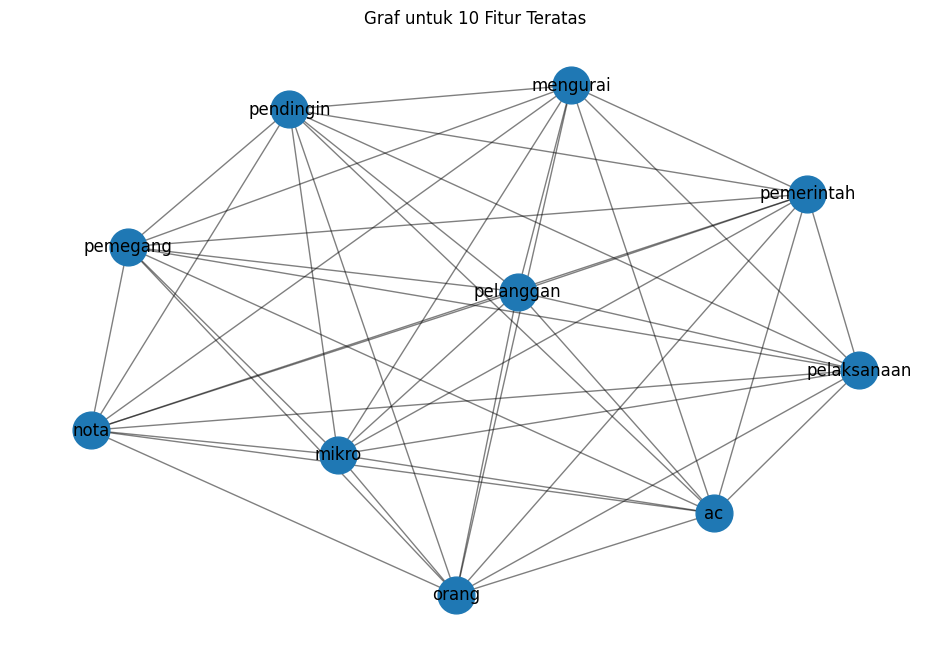

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Pastikan df_tfidf_1berita adalah nama yang benar dari dataframe yang mengandung data biner (TF-IDF)
if 'df_tfidf_1berita' in locals():
    # Menambahkan edge berdasarkan co-occurrence dari fitur teratas
    for i in range(len(df_tfidf_1berita)):
        features = df_tfidf_1berita.iloc[i]
        active_features = features[features == 1].index.tolist()
        active_top_10_features = [f for f in active_features if f in top_10_features]

        for j in range(len(active_top_10_features)):
            for k in range(j + 1, len(active_top_10_features)):
                G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

    # Mengatur ukuran figure untuk visualisasi graf
    plt.figure(figsize=(12, 8))

    # Menggambar graf fitur teratas
    pos = nx.spring_layout(G_top_10)
    nx.draw_networkx_nodes(G_top_10, pos, node_size=700)
    nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')

    # Menampilkan graf
    plt.title('Graf untuk 10 Fitur Teratas')
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()
else:
    print("DataFrame 'df_tfidf_1berita' tidak ditemukan. Pastikan proses TF-IDF sudah dilakukan.")


In [10]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

          Node  Degree Centrality  Closeness Centrality  \
0           ac                1.0                   1.0   
1     mengurai                1.0                   1.0   
2    pendingin                1.0                   1.0   
3   pemerintah                1.0                   1.0   
4     pemegang                1.0                   1.0   
5    pelanggan                1.0                   1.0   
6  pelaksanaan                1.0                   1.0   
7        orang                1.0                   1.0   
8         nota                1.0                   1.0   
9        mikro                1.0                   1.0   

   Betweenness Centrality  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     0.0  
9                     0.0  


In [11]:
# Mengambil kata kunci dengan nilai TF-IDF tertinggi untuk setiap dokumen
kata_kunci = df_tfidf_1berita.idxmax(axis=1)
print("\nKata kunci dari setiap dokumen:")
for i, kata in enumerate(kata_kunci):
    print(f"Dokumen {i+1}: {kata}")


Kata kunci dari setiap dokumen:
Dokumen 1: ac
